In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv("homeprices.csv")
df
df.describe()
df.shape

(5, 2)

# Check that original plot distribution is suitable for a linear regression model

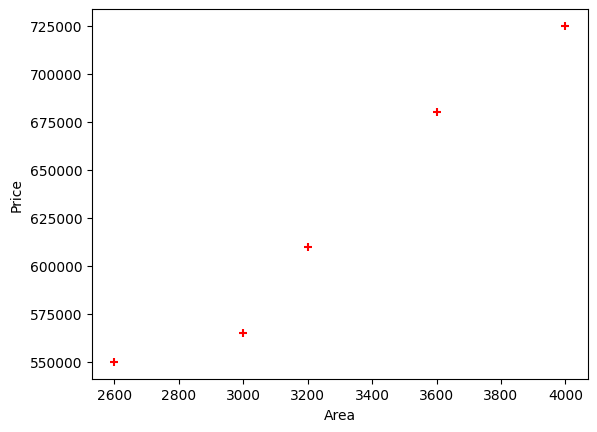

In [3]:
%matplotlib inline
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(df.area, df.price, color='red', marker='+')

In [4]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)

LinearRegression()

In [5]:
test_df = pd.DataFrame({'area':[2010, 3300, 5000]})
test_df
p =reg.predict(test_df)
test_df['prices'] = p
test_df.to_csv('prediction.csv')

# Saving a model to a file using pickle

In [6]:
# save model to a file using pickle
# pickle implements binary protocols for serializing and de-serializing a Python object structure
import pickle
with open('pickle_model', 'wb') as f:
    pickle.dump(reg, f)

In [7]:
with open('pickle_model', 'rb') as f:
    model = pickle.load(f)

test_df_2 = pd.DataFrame({'area':[2010, 3300, 5000]})
# can now use model loaded from file to continue predictions
model.predict(test_df_2)

array([453549.65753425, 628715.75342466, 859554.79452055])

# Saving model to a file using sklearn's joblib

In [ ]:
# a pickle replacement
# joblib.dump and joblib.load is more efficient when working with sklearn's fitted learn estimators
import joblib
joblib.dump(reg, 'reg_joblib')
model2 = joblib.load('reg_joblib')
model2.predict(test_df_2)

array([453549.65753425, 628715.75342466, 859554.79452055])

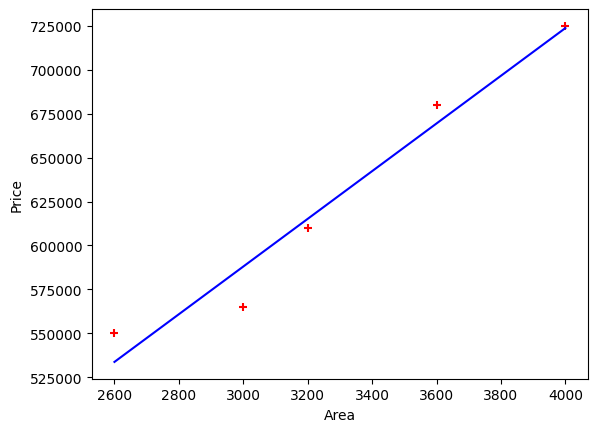

In [ ]:
%matplotlib inline
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(df.area, df.price, color='red', marker='+')
plt.plot(df.area, reg.predict(df[['area']]), color='blue')


# Exercise - Per Capita Income Linear Regression

In [ ]:
df_income = pd.read_csv("canada_per_capita_income.csv", header=0, names=['year', 'income'])
df_income


,year,income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


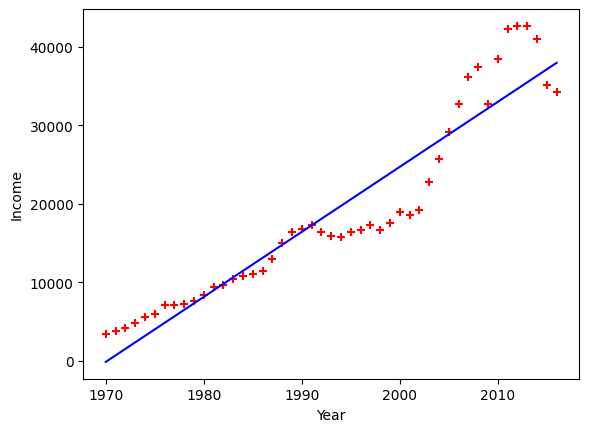

In [ ]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('Income')
reg_income = linear_model.LinearRegression()
reg_income.fit(df_income[['year']], df_income.income)
p_income = reg_income.predict(df_income[['year']])
plt.scatter(df_income.year, df_income.income, color='red', marker='+')

# plot line of best fit in blue
plt.plot(df_income.year, p_income, color='blue')

In [ ]:
# predict per capita income in 2025
test_df_income = pd.DataFrame({'year':[2025]})
p_income_test = reg_income.predict(test_df_income[['year']])
test_df_income['income'] = p_income_test
test_df_income

,year,income
0,2025,45431.019471
